<a href="https://colab.research.google.com/github/rinnarachma/latihan-DA/blob/main/Day_2_ToT_DA_SMA_Model_Improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, learning_curve, LearningCurveDisplay, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

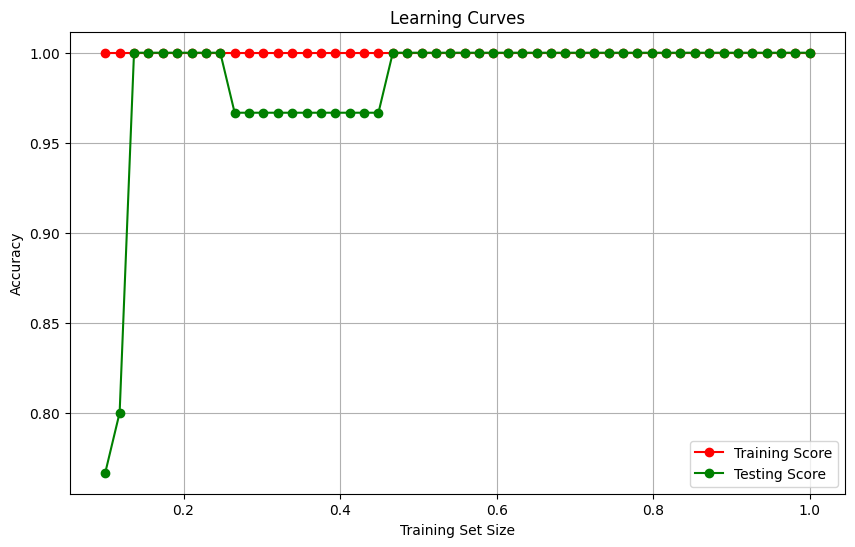

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target


# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#used to devide
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []


clf = RandomForestClassifier(n_estimators=100, random_state=42)


for train_size in train_sizes:
   num_samples = int(train_size * len(X_train))
   X_subset = X_train[:num_samples]
   y_subset = y_train[:num_samples]


   clf.fit(X_subset, y_subset)


   y_pred_train = clf.predict(X_subset)
   acc_train = accuracy_score(y_subset, y_pred_train)
   learning_curve_train.append(acc_train)


   y_pred_test = clf.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred_test)
   learning_curve_test.append(acc_test)


# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()


In [ ]:
iris = load_iris()
clf = DecisionTreeClassifier(random_state=0)


cv_score = cross_val_score(clf, iris.data, iris.target, cv=10)
print("Cross Validation Score")
print(cv_score)

Cross Validation Score
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


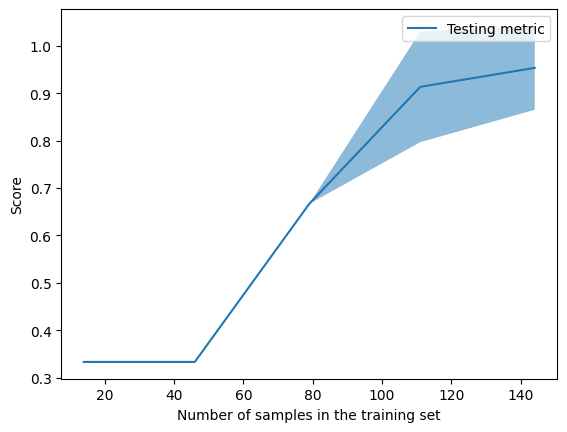

In [ ]:
X, y = load_iris(return_X_y=True)
tree = DecisionTreeClassifier(random_state=32)
train_sizes, train_scores, test_scores = learning_curve(
   tree, X, y, cv=25)
display = LearningCurveDisplay(train_sizes=train_sizes,
   train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

In [ ]:
y_pred = cross_val_predict(clf, X, y, cv=5)

#Feature Importance

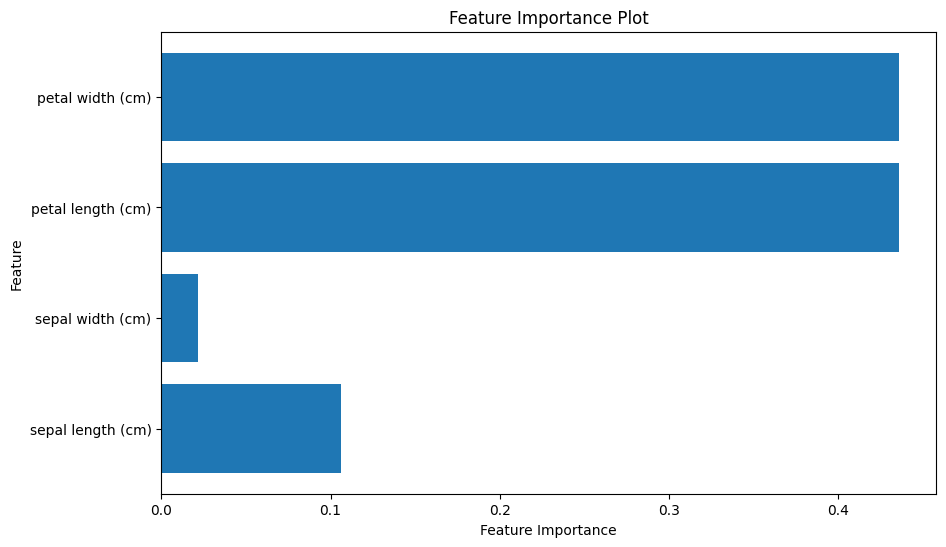

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names


# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Fit model ke data
rf_model.fit(X, y)


# Mengukur feature importance
feature_importance = rf_model.feature_importances_


# Membuat chart untuk menampilkan feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance, align='center')
plt.yticks(np.arange(X.shape[1]), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names


# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Fit model ke data
rf_model.fit(X, y)


# Mengukur feature importance
feature_importance = rf_model.feature_importances_

In [ ]:
feature_importance

array([0.10612762, 0.02167809, 0.43612951, 0.43606478])

#Hyperparameter Tuning

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split


# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target


# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier()


# Daftar hyperparameter yang ingin dioptimalkan dan rentang nilai yang ingin dijelajahi
param_grid = {
   'max_depth': [3, 5, 7, 10],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}


# Inisialisasi Grid Search dengan model Decision Tree dan daftar hyperparameter
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')


# Melatih Grid Search pada data latih
grid_search.fit(X_train, y_train)


# Mendapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Hyperparameter terbaik:", best_params)

Hyperparameter terbaik: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
# Membuat model Decision Tree dengan hyperparameter terbaik
best_dt_model = DecisionTreeClassifier(**best_params)


# Melatih model terbaik pada data latih
best_dt_model.fit(X_train, y_train)


# Evaluasi kinerja model pada data uji
accuracy = best_dt_model.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)

Akurasi model terbaik: 1.0


# RFE

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Contoh data untuk klasifikasi
X, y = make_classification(n_samples=100, n_features=10, random_state=42)


# Inisialisasi model untuk RFE
estimator = LogisticRegression()


# Menerapkan RFE
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)


# Mendapatkan indeks fitur yang dipilih
selected_indices = selector.get_support(indices=True)


# Tampilkan fitur yang dipilih
selected_features = X[:, selected_indices]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target


# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Fit model ke data
rf_model.fit(X, y)


# Menggunakan SelectFromModel untuk memilih fitur yang penting
selector = SelectFromModel(rf_model, threshold=0.1)  # Ambil fitur dengan feature importance di atas threshold tertentu
selector.fit(X, y)


# Mendapatkan fitur yang terpilih
selected_features = np.array(iris.feature_names)[selector.get_support()]


print("Fitur yang terpilih:", selected_features)


Fitur yang terpilih: ['sepal length (cm)' 'petal length (cm)' 'petal width (cm)']


In [ ]:
print(selected_indices)

[0 1 2 3 6]


In [ ]:
print(selected_features)

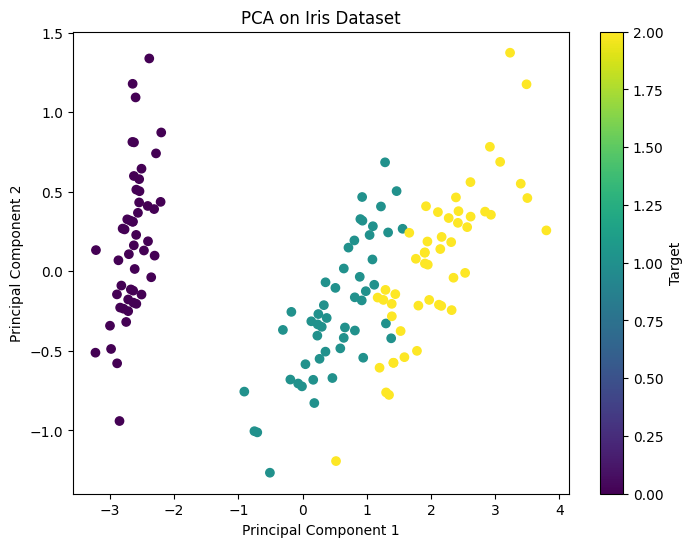

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target


# Inisialisasi dan fit-transform PCA dengan 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Plot hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()